# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.14.0-lambda'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **19th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See'],
 3: ['Fiji', 'Timor-Leste', 'Laos', 'Saint Kitts and Nevis'],
 4: ['Grenada', 'Dominica', 'Tanzania'],
 6: ['Equatorial Guinea', 'Saint Vincent and the Grenadines'],
 7: ['Brunei', 'Northern Mariana Islands'],
 8: ['Seychelles', 'Cambodia', 'Kyrgyzstan', 'Liechtenstein', 'Saint Lucia',
     'Mauritius', 'Bahamas'],
 9: ['Guam', 'Trinidad and Tobago', 'Republic of the Congo', 'Ethiopia',
     'Antigua and Barbuda', 'Uzbekistan', 'Australia', 'Madagascar',
     'Papua New Guinea', 'Guyana', 'Botswana'],
 10: ['Angola', 'Guatemala', 'India', 'Oman', 'Bhutan', 'Iraq', 'Libya',
      'Kenya', 'Vietnam', 'Djibouti', 'Bahrain', 'Zimbabwe', 'Maldives',
      'Venezuela', 'Philippines', 'Iceland', 'Singapore',
      'Sao Tome and Principe', 'Kazakhstan', 'Barbados', 'Belize', 'Nicaragua',
      'Jamaica', 'Monaco'],
 11: ['Dominican Republic', 'Saudi Arabia', 'Zambia', 'Chile', 'Paraguay',
      'Rwanda', 'Syria', 'Suriname', 'Bangladesh', 'El Salvador', 'Mozambique',
      'M

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=19)
# The number of countries
len(analyser.countries)

3

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{19: ['Sweden', 'Switzerland'], 20: ['Germany']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Germany 0th    Past  19Jan2020  23Mar2020    82905782
        1st    Past  24Mar2020  06Apr2020    82905782
        2nd    Past  07Apr2020  05May2020    82905782
        3rd    Past  06May2020  04Aug2020    82905782
        4th    Past  05Aug2020  12Sep2020    82905782
        5th    Past  13Sep2020  07Oct2020    82905782
        6th    Past  08Oct2020  20Oct2020    82905782
        7th    Past  21Oct2020  27Oct2020    82905782
        8th    Past  28Oct2020  03Nov2020    82905782
        9th    Past  04Nov2020  10Nov2020    82905782
        10th   Past  11Nov2020  17Nov2020    82905782
        11th   Past  18Nov2020  24Nov2020    82905782
        12th   Past  25Nov2020  01Dec2020    82905782
        13th   Past  02Dec2020  08Dec2020    82905782
        14th   Past  09Dec2020  15Dec2020    82905782
        15th   Past  16Dec2020  21Dec2020    82905782
        16th   Past  22Dec2020  28Dec2020    82905782
        17th   Past  29Dec2020  04Jan2021    82905782
        18th   Past  05Jan2021  10Jan2021    82905782
        19th   Past  11Jan2021  17Jan2021    82905782

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	SWE, 12th phase (02Dec2020 - 08Dec2020): finished  344 trials in 0 min 10 sec

	DEU,  8th phase (28Oct2020 - 03Nov2020): finished  342 trials in 0 min 10 sec

	CHE,  2nd phase (07Apr2020 - 02Aug2020): finished  308 trials in 0 min 10 sec

	SWE, 18th phase (10Jan2021 - 17Jan2021): finished  342 trials in 0 min 10 sec

	SWE, 14th phase (16Dec2020 - 21Dec2020): finished  346 trials in 0 min 10 sec

	CHE, 14th phase (14Dec2020 - 20Dec2020): finished  344 trials in 0 min 10 sec

	CHE,  1st phase (23Mar2020 - 06Apr2020): finished  340 trials in 0 min 10 sec

	CHE,  5th phase (06Oct2020 - 14Oct2020): finished  344 trials in 0 min 10 sec

	DEU,  3rd phase (06May2020 - 04Aug2020): finished  318 trials in 0 min 10 sec

	DEU,  5th phase (13Sep2020 - 07Oct2020): finished  337 trials in 0 min 10 sec

	CHE,  0th phase (03Mar2020 - 22Mar2020): finished  337 trials in 0 min 10 sec

	SWE,  1st phase (16Apr2020 - 12May2020): finished  337 trials in 0 min 10 sec

	CHE,  6th phase (15Oct2020 - 20Oct2020): finished  346 trials in 0 min 10 sec

	DEU,  6th phase (08Oct2020 - 20Oct2020): finished  340 trials in 0 min 10 sec

	CHE, 13th phase (08Dec2020 - 13Dec2020): finished  344 trials in 0 min 10 sec

	CHE, 15th phase (21Dec2020 - 27Dec2020): finished  343 trials in 0 min 10 sec

	CHE, 16th phase (28Dec2020 - 02Jan2021): finished  344 trials in 0 min 10 sec

	DEU,  4th phase (05Aug2020 - 12Sep2020): finished  333 trials in 0 min 10 sec

	CHE,  3rd phase (03Aug2020 - 07Sep2020): finished  335 trials in 0 min 10 sec

	CHE,  4th phase (08Sep2020 - 05Oct2020): finished  336 trials in 0 min 10 sec

	SWE, 11th phase (25Nov2020 - 01Dec2020): finished  344 trials in 0 min 10 sec

	SWE,  4th phase (25Jun2020 - 12Aug2020): finished  328 trials in 0 min 10 sec

	CHE,  8th phase (27Oct2020 - 05Nov2020): finished  343 trials in 0 min 10 sec

	SWE,  6th phase (05Oct2020 - 26Oct2020): finished  339 trials in 0 min 10 sec

	CHE, 11th phase (24Nov2020 - 30Nov2020): finished  344 trials in 0 min 10 sec

	SWE,  7th phase (27Oct2020 - 03Nov2020): finished  344 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 06Apr2020): finished  340 trials in 0 min 10 sec

	DEU, 18th phase (05Jan2021 - 10Jan2021): finished  344 trials in 0 min 10 sec

	SWE, 17th phase (04Jan2021 - 09Jan2021): finished  345 trials in 0 min 10 sec

	DEU,  7th phase (21Oct2020 - 27Oct2020): finished  344 trials in 0 min 10 sec

	SWE,  9th phase (11Nov2020 - 17Nov2020): finished  342 trials in 0 min 10 sec

	CHE, 17th phase (03Jan2021 - 09Jan2021): finished  338 trials in 0 min 10 sec

	SWE,  0th phase (21Feb2020 - 15Apr2020): finished  302 trials in 0 min 10 sec

	SWE, 10th phase (18Nov2020 - 24Nov2020): finished  308 trials in 0 min 10 sec

	SWE, 13th phase (09Dec2020 - 15Dec2020): finished  304 trials in 0 min 10 sec

	SWE,  5th phase (13Aug2020 - 04Oct2020): finished  294 trials in 0 min 10 sec

	CHE, 10th phase (17Nov2020 - 23Nov2020): finished  342 trials in 0 min 10 sec

	CHE, 12th phase (01Dec2020 - 07Dec2020): finished  338 trials in 0 min 10 sec

	DEU, 17th phase (29Dec2020 - 04Jan2021): finished  342 trials in 0 min 10 sec

	SWE,  8th phase (04Nov2020 - 10Nov2020): finished  338 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  321 trials in 0 min 10 sec

	CHE,  7th phase (21Oct2020 - 26Oct2020): finished  341 trials in 0 min 10 sec

	DEU, 19th phase (11Jan2021 - 17Jan2021): finished  338 trials in 0 min 10 sec

	SWE, 16th phase (29Dec2020 - 03Jan2021): finished  341 trials in 0 min 10 sec

	SWE,  3rd phase (08Jun2020 - 24Jun2020): finished  338 trials in 0 min 10 sec

	DEU,  2nd phase (07Apr2020 - 05May2020): finished  331 trials in 0 min 10 sec

	SWE,  2nd phase (13May2020 - 07Jun2020): finished  334 trials in 0 min 10 sec

	CHE,  9th phase (06Nov2020 - 16Nov2020): finished  339 trials in 0 min 10 sec

	SWE, 15th phase (22Dec2020 - 28Dec2020): finished  369 trials in 0 min 10 sec

Completed optimization. Total: 2 min 19 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Germany 0th    Past  19Jan2020  23Mar2020    82905782  SIR-F  2.41  0.037866   
        1st    Past  24Mar2020  06Apr2020    82905782  SIR-F  4.06  0.050861   
        2nd    Past  07Apr2020  05May2020    82905782  SIR-F  0.51  0.032126   
        3rd    Past  06May2020  04Aug2020    82905782  SIR-F  0.75  0.000131   
        4th    Past  05Aug2020  12Sep2020    82905782  SIR-F  1.43  0.004204   
        5th    Past  13Sep2020  07Oct2020    82905782  SIR-F  1.54  0.000066   
        6th    Past  08Oct2020  20Oct2020    82905782  SIR-F  3.06  0.000676   
        7th    Past  21Oct2020  27Oct2020    82905782  SIR-F  3.03  0.002617   
        8th    Past  28Oct2020  03Nov2020    82905782  SIR-F  2.39  0.017998   
        9th    Past  04Nov2020  10Nov2020    82905782      -     -         -   
        10th   Past  11Nov2020  17Nov2020    82905782      -     -         -   
        11th   Past  18Nov2020  24Nov2020    82905782      -     -         -   
        12th   Past  25Nov2020  01Dec2020    82905782      -     -         -   
        13th   Past  02Dec2020  08Dec2020    82905782      -     -         -   
        14th   Past  09Dec2020  15Dec2020    82905782      -     -         -   
        15th   Past  16Dec2020  21Dec2020    82905782      -     -         -   
        16th   Past  22Dec2020  28Dec2020    82905782      -     -         -   
        17th   Past  29Dec2020  04Jan2021    82905782  SIR-F  0.44  0.003466   
        18th   Past  05Jan2021  10Jan2021    82905782  SIR-F  0.90  0.003164   
        19th   Past  11Jan2021  17Jan2021    82905782  SIR-F  0.94  0.000436   

                  kappa       rho     sigma    tau alpha1 [-] 1/beta [day]  \
Country Phase                                                                
Germany 0th    0.000098  0.013353  0.005235  360.0      0.038         18.0   
        1st    0.000236  0.022128  0.004932  360.0      0.051         11.0   
        2nd    0.000319  0.011309  0.021196  360.0      0.032         22.0   
        3rd    0.000168  0.012632  0.016764  360.0      0.000         19.0   
        4th    0.000048  0.019114  0.013234  360.0      0.004         13.0   
        5th    0.000152  0.018398  0.011818  360.0      0.000         13.0   
        6th    0.000067  0.025861  0.008365  360.0      0.001          9.0   
        7th    0.000301  0.027296  0.008690  360.0      0.003          9.0   
        8th    0.000070  0.019524  0.007946  360.0      0.018         12.0   
        9th           -         -         -      -          -            -   
        10th          -         -         -      -          -            -   
        11th          -         -         -      -          -            -   
        12th          -         -         -      -          -            -   
        13th          -         -         -      -          -            -   
        14th          -         -         -      -          -            -   
        15th          -         -         -      -          -            -   
        16th          -         -         -      -          -            -   
        17th   0.000070  0.008580  0.019517  360.0      0.003         29.0   
        18th   0.000002  0.018569  0.020502  360.0      0.003         13.0   
        19th   0.000098  0.015943  0.016802  360.0      0.000         15.0   

              1/alpha2 [day] 1/gamma [day]     RMSLE Trials       Runtime  
Country Phase                                                              
Germany 0th           2545.0          47.0  1.594642  321.0  0 min 10 sec  
        1st           1057.0          50.0  0.204869  340.0  0 min 10 sec  
        2nd            784.0          11.0  0.095076  331.0  0 min 10 sec  
        3rd           1488.0          14.0  0.232941  318.0  0 min 10 sec  
        4th           5181.0          18.0  0.070941  333.0  0 min 10 sec  
     

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-21,Sweden,0.602763,0.544883,0.031009,0.00485,0.603,0,8,51,...,0,0,0,0,0,0,0,1,2,0.0
1,2020-02-21,Sweden,0.602763,0.544883,0.031009,0.00485,0.603,0,8,51,...,0,0,0,0,0,0,0,1,2,0.0
2,2020-02-21,Sweden,0.602763,0.544883,0.031009,0.00485,0.603,0,8,51,...,0,0,0,0,0,0,0,1,2,0.0
3,2020-02-21,Sweden,0.602763,0.544883,0.031009,0.00485,0.603,0,8,51,...,0,0,0,0,0,0,0,1,2,0.0
4,2020-02-21,Sweden,0.602763,0.544883,0.031009,0.00485,0.603,0,8,51,...,0,0,0,0,0,0,0,1,2,0.0


### $Rt$: Reprodcution number $\mathrm{[-]}$

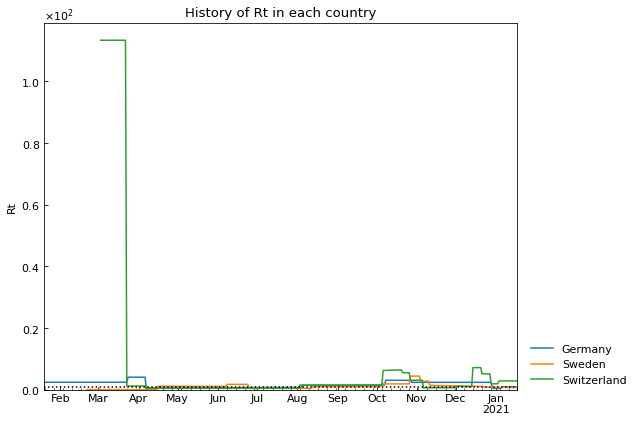

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.94,0.69,2.84
2021-01-14,0.94,0.69,2.84
2021-01-15,0.94,0.69,2.84
2021-01-16,0.94,0.69,2.84
2021-01-17,0.94,0.69,2.84


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

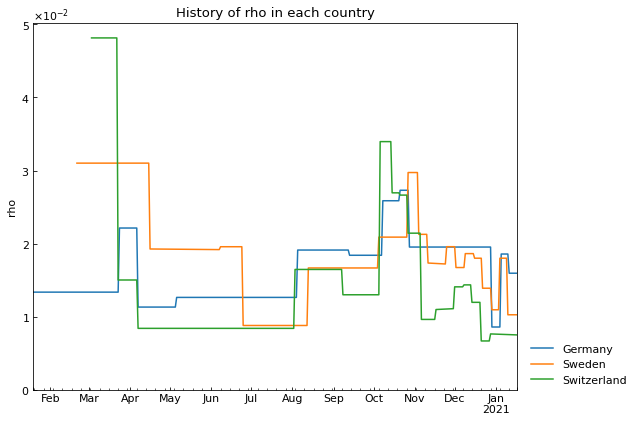

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.015943,0.010255,0.007498
2021-01-14,0.015943,0.010255,0.007498
2021-01-15,0.015943,0.010255,0.007498
2021-01-16,0.015943,0.010255,0.007498
2021-01-17,0.015943,0.010255,0.007498


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

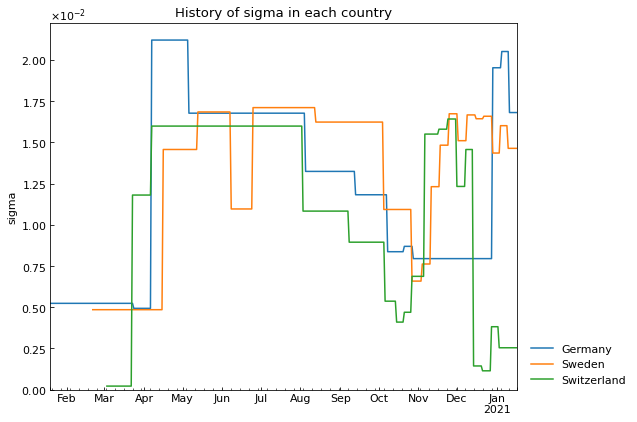

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.016802,0.014631,0.002542
2021-01-14,0.016802,0.014631,0.002542
2021-01-15,0.016802,0.014631,0.002542
2021-01-16,0.016802,0.014631,0.002542
2021-01-17,0.016802,0.014631,0.002542


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

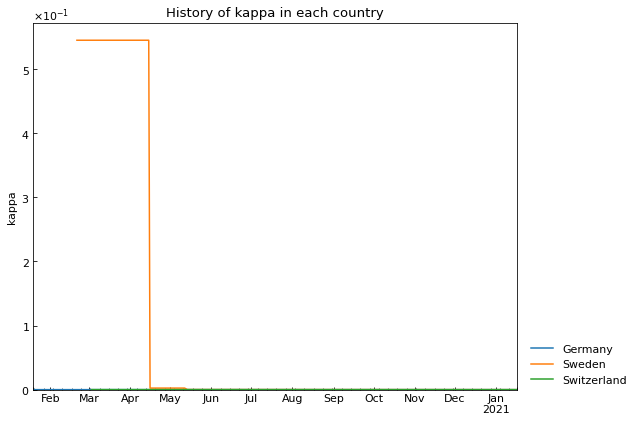

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.000098,0.00007,0.000098
2021-01-14,0.000098,0.00007,0.000098
2021-01-15,0.000098,0.00007,0.000098
2021-01-16,0.000098,0.00007,0.000098
2021-01-17,0.000098,0.00007,0.000098


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

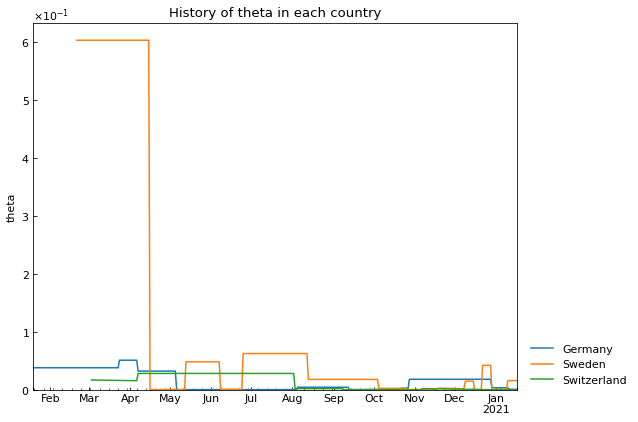

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.000436,0.015708,0.00044
2021-01-14,0.000436,0.015708,0.00044
2021-01-15,0.000436,0.015708,0.00044
2021-01-16,0.000436,0.015708,0.00044
2021-01-17,0.000436,0.015708,0.00044


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18150 entries, 0 to 18177
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 18150 non-null  datetime64[ns]
 1   Country                              18150 non-null  object        
 2   Rt                                   18150 non-null  float64       
 3   theta                                18150 non-null  float64       
 4   kappa                                18150 non-null  float64       
 5   rho                                  18150 non-null  float64       
 6   sigma                                18150 non-null  float64       
 7   School_closing                       18150 non-null  int64         
 8   Workplace_closing                    18150 non-null  int64         
 9   Cancel_events                        18150 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.042822,-0.044254,0.695630,-0.422387,-0.199271,-0.181600,-0.043962,-0.162034,-0.095194,-0.326634,-0.317406,-0.305054,-0.065218,-0.215119,-0.210282,-0.177314
theta,-0.042822,1.000000,0.986877,0.283059,-0.197798,-0.156436,-0.293946,-0.269075,-0.187814,0.041600,-0.290618,-0.377562,-0.294367,-0.268675,-0.293482,-0.067423,-0.212976
kappa,-0.044254,0.986877,1.000000,0.319065,-0.225474,-0.161462,-0.258214,-0.225674,-0.161903,0.021657,-0.263340,-0.343848,-0.270044,-0.235186,-0.228328,-0.004486,-0.203553
rho,0.695630,0.283059,0.319065,1.000000,-0.549610,-0.331624,-0.255165,-0.085002,-0.200422,0.083826,-0.279193,-0.313029,-0.305487,-0.101440,-0.158034,-0.132841,-0.220065
sigma,-0.422387,-0.197798,-0.225474,-0.549610,1.000000,0.322498,0.336668,0.348872,0.373191,0.206741,0.390240,0.431671,0.465040,0.288620,0.280357,-0.063834,0.437706
School_closing,-0.199271,-0.156436,-0.161462,-0.331624,0.322498,1.000000,0.370524,0.525953,0.081199,-0.114663,0.571587,0.569743,0.584090,0.438019,0.145794,0.169995,0.404625
Workplace_closing,-0.181600,-0.293946,-0.258214,-0.255165,0.336668,0.370524,1.000000,0.516404,0.821999,-0.029326,0.612214,0.566235,0.589209,0.432955,0.254448,0.145356,0.801584
Cancel_events,-0.043962,-0.269075,-0.225674,-0.085002,0.348872,0.525953,0.516404,1.000000,0.536722,0.138375,0.632255,0.679842,0.806992,0.864970,0.505285,0.277463,0.701501
Gatherings_restrictions,-0.162034,-0.187814,-0.161903,-0.200422,0.373191,0.081199,0.821999,0.536722,1.000000,0.170771,0.481719,0.493179,0.580339,0.446802,0.197640,0.000608,0.846671
Transport_closing,-0.095194,0.041600,0.021657,0.083826,0.206741,-0.114663,-0.029326,0.138375,0.170771,1.000000,0.303367,0.098603,0.118514,0.111959,-0.037679,-0.341368,0.330752


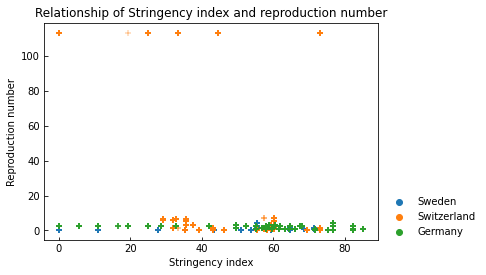

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()